In [24]:
#colab <-> kaggle 연동하기

!pip install kaggle
from google.colab import files
files.upload()  #파일 업로드

#json 파일 옮겨주기
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#권한에 대해서 600으로 read 허용
!chmod 600 ~/.kaggle /kaggle.json

#json 파일이 제대로 업로드 되었는지 확인
!ls -1ha kaggle.json

# 내가 참가한 모든 대회 확인
!kaggle competitions list


Saving kaggle.json to kaggle (1).json
chmod: cannot access '/kaggle.json': No such file or directory
kaggle.json
ref                                            deadline             category             reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ----------  ---------  --------------  
digit-recognizer                               2030-01-01 00:00:00  Getting Started   Knowledge       2229           False  
titanic                                        2030-01-01 00:00:00  Getting Started   Knowledge      16599           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started   Knowledge       4554           False  
connectx                                       2030-01-01 00:00:00  Getting Started   Knowledge        328           False  
competitive-data-science-predict-future-sales  2020-12-31 23:59:00  Playground            Kudos       6006           False  
m5-forecasti

In [72]:
cd /content/drive/My Drive/투빅스/7week

/content/drive/My Drive/투빅스/7week


In [73]:
!kaggle competitions download -c tobigs13nn

train_df.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test_df.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [74]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

!pip install tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

print(tf.__version__)

2.0.0-rc1


In [0]:
# pandas 사용하여 데이터셋 읽기

sample_submission = pd.read_csv("sample_submission.csv")

In [76]:
# pandas 사용하여 "test" 데이터셋 읽기

test = pd.read_csv("test_df.csv")
test.head()

,Unnamed: 0,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,57808,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,35755,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,48968,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
# pandas 사용하여 "train" 데이터셋 읽기

train = pd.read_csv("train_df.csv",
                      skipinitialspace=True)
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = train.iloc[:,1:].values
y = train.iloc[:,0].values

In [0]:
X_test = test.iloc[:,1:].values

X = X / 255
X_test = X_test / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=2018 )


In [81]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


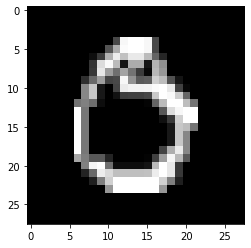

In [82]:
import matplotlib.pyplot as plt
idx = 0
plt.imshow(x_train[idx].reshape(28,28), cmap="gray")

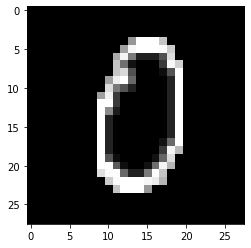

In [83]:
import matplotlib.pyplot as plt
idx = 500
plt.imshow(x_train[idx].reshape(28,28), cmap="gray")

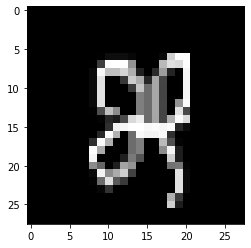

In [84]:
import matplotlib.pyplot as plt
idx = 30
plt.imshow(x_train[idx].reshape(28,28), cmap="gray")

#1 - radam 이용

In [0]:
num_classes = 10
model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, input_shape = (784,)), # 784개의 특성
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation="selu"), #relu함수 사용
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(256, activation="selu"),
            tf.keras.layers.Dense(num_classes , activation="softmax"), #출력층 softmax 사용
])

In [86]:
!pip install keras_radam

In [0]:
from keras_radam.training import RAdamOptimizer

model.compile(optimizer=RAdamOptimizer(),loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_10 (Batc (None, 64)                256       
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)              

In [89]:
history = model.fit(x_train, y_train, batch_size=512, epochs=20, validation_data=[x_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 1s 37us/sample - loss: 1.7456 - accuracy: 0.4317 - val_loss: 0.9739 - val_accuracy: 0.8064
Epoch 2/20
33600/33600 [==============================] - 1s 21us/sample - loss: 0.5001 - accuracy: 0.8444 - val_loss: 0.3789 - val_accuracy: 0.9181
Epoch 3/20
33600/33600 [==============================] - 1s 20us/sample - loss: 0.2951 - accuracy: 0.9079 - val_loss: 0.2231 - val_accuracy: 0.9402
Epoch 4/20
33600/33600 [==============================] - 1s 21us/sample - loss: 0.2215 - accuracy: 0.9332 - val_loss: 0.1690 - val_accuracy: 0.9510
Epoch 5/20
33600/33600 [==============================] - 1s 21us/sample - loss: 0.1876 - accuracy: 0.9434 - val_loss: 0.1478 - val_accuracy: 0.9574
Epoch 6/20
33600/33600 [==============================] - 1s 21us/sample - loss: 0.1648 - accuracy: 0.9504 - val_loss: 0.1349 - val_accuracy: 0.9601
Epoch 7/20
33600/33600 [==============================] -

In [90]:
predict = model.predict_classes(X_test)
predict


array([8, 0, 5, ..., 3, 4, 1])

In [0]:
sample_submission["Category"] = pd.Series(predict)

In [92]:
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("radam_submission.csv",index=False)

#2 - RMSprop

In [0]:
num_classes = 10
model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, input_shape = (784,)), # 784개의 특성
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation="sigmoid"), #relu함수 사용
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(num_classes , activation="softmax"), #출력층 softmax 사용
])

In [0]:
from tensorflow.keras.optimizers import RMSprop

opt = RMSprop(lr=0.001)

model.compile(optimizer = opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [98]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_12 (Batc (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_13 (Batc (None, 128)               512       
_________________________________________________________________
dropout_13 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)              

In [104]:
history2 = model.fit(x_train, y_train, batch_size=512, epochs=100, validation_data=[x_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/100
33600/33600 [==============================] - 1s 16us/sample - loss: 0.0329 - accuracy: 0.9890 - val_loss: 0.0828 - val_accuracy: 0.9813
Epoch 2/100
33600/33600 [==============================] - 1s 16us/sample - loss: 0.0321 - accuracy: 0.9888 - val_loss: 0.0852 - val_accuracy: 0.9801
Epoch 3/100
33600/33600 [==============================] - 1s 16us/sample - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0767 - val_accuracy: 0.9807
Epoch 4/100
33600/33600 [==============================] - 1s 16us/sample - loss: 0.0299 - accuracy: 0.9902 - val_loss: 0.0779 - val_accuracy: 0.9806
Epoch 5/100
33600/33600 [==============================] - 1s 15us/sample - loss: 0.0278 - accuracy: 0.9904 - val_loss: 0.0782 - val_accuracy: 0.9818
Epoch 6/100
33600/33600 [==============================] - 1s 16us/sample - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.0790 - val_accuracy: 0.9815
Epoch 7/100
33600/33600 [==========================

In [105]:
predict2 = model.predict_classes(X_test)
predict2

array([8, 0, 5, ..., 3, 4, 1])

In [0]:
sample_submission["Category"] = pd.Series(predict2)

In [107]:
sample_submission.head()

,Id,Category
0,57808,8
1,4960,0
2,35755,5
3,15543,3
4,48968,8


In [0]:
sample_submission.to_csv("RMS_submission.csv",index=False)

#3. Adam 이용

In [0]:
num_classes = 10
model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, input_shape = (784,)), # 784개의 특성
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(128, activation="selu"), #relu함수 사용
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(256, activation="relu"),
            tf.keras.layers.Dense(num_classes , activation="softmax"), #출력층 softmax 사용
])

In [0]:
from tensorflow.keras.optimizers import Adadelta

opt = Adadelta(rho=0.95)

model.compile(optimizer = opt,
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [116]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 64)                50240     
_________________________________________________________________
batch_normalization_17 (Batc (None, 64)                256       
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)               512       
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)              

In [121]:
history3 = model.fit(x_train, y_train, batch_size=550, epochs=500, validation_data=[x_val, y_val])

Train on 33600 samples, validate on 8400 samples
Epoch 1/500
33600/33600 [==============================] - 0s 14us/sample - loss: 0.2298 - accuracy: 0.9325 - val_loss: 0.1795 - val_accuracy: 0.9492
Epoch 2/500
33600/33600 [==============================] - 0s 14us/sample - loss: 0.2282 - accuracy: 0.9322 - val_loss: 0.1793 - val_accuracy: 0.9492
Epoch 3/500
33600/33600 [==============================] - 0s 14us/sample - loss: 0.2299 - accuracy: 0.9325 - val_loss: 0.1791 - val_accuracy: 0.9489
Epoch 4/500
33600/33600 [==============================] - 0s 14us/sample - loss: 0.2277 - accuracy: 0.9330 - val_loss: 0.1788 - val_accuracy: 0.9490
Epoch 5/500
33600/33600 [==============================] - 0s 14us/sample - loss: 0.2286 - accuracy: 0.9321 - val_loss: 0.1786 - val_accuracy: 0.9490
Epoch 6/500
33600/33600 [==============================] - 0s 14us/sample - loss: 0.2255 - accuracy: 0.9340 - val_loss: 0.1784 - val_accuracy: 0.9493
Epoch 7/500
33600/33600 [==========================

In [122]:
predict3 = model.predict_classes(X_test)
predict3

array([8, 0, 5, ..., 3, 4, 1])

In [0]:
sample_submission["Category"] = pd.Series(predict3)
sample_submission.head()

sample_submission.to_csv("Adade_submission.csv",index=False)

참고 사이트 : https://forensics.tistory.com/28